# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2023

Мягий дедлайн: 23:59 12.12.2023

Жестокий дедлайн: 23:59 14.12.2023

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/56884/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.datasets import make_moons, make_circles, make_classification
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

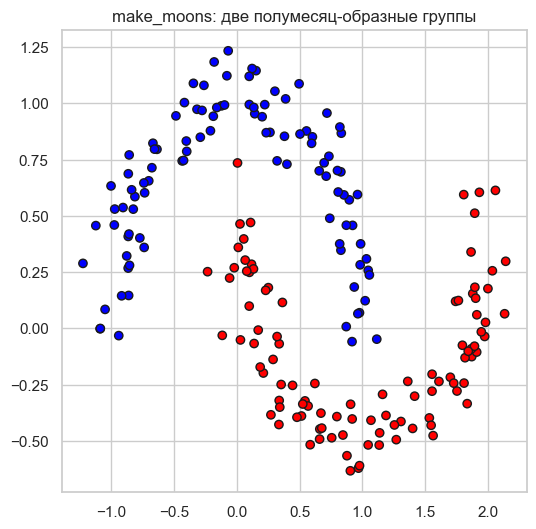

In [4]:
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# рисуем
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolor="k")
plt.title("make_moons: две полумесяц-образные группы")
plt.show()


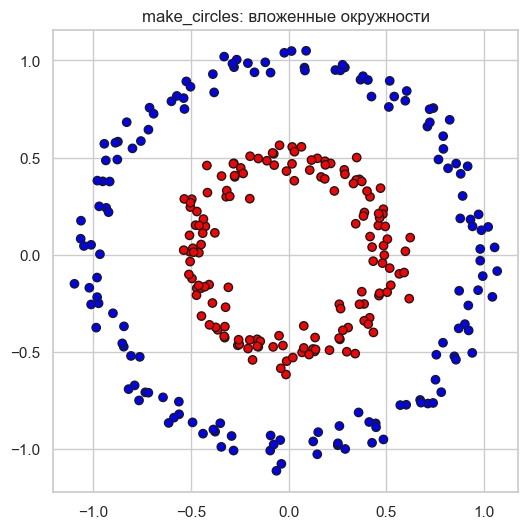

In [5]:
X, y = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolor="k")
plt.title("make_circles: вложенные окружности")
plt.show()


In [6]:
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [7]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

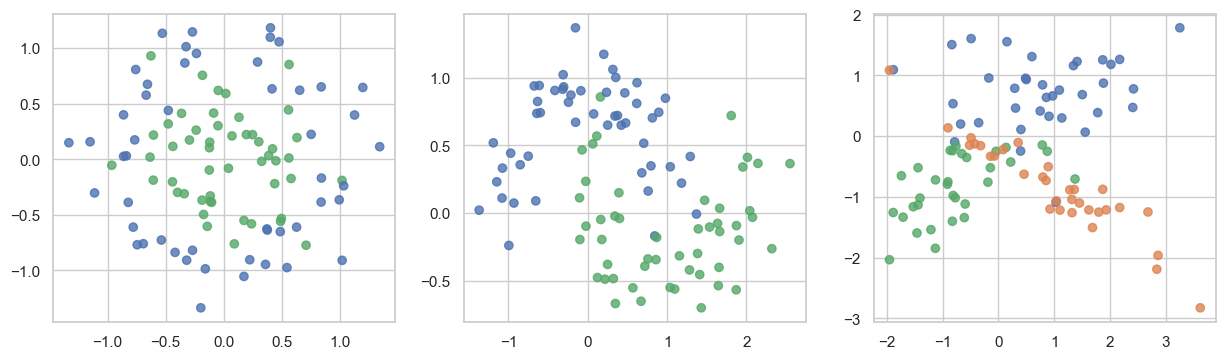

In [8]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [9]:
X, y = [], []
for dataset in datasets:
    X.append(dataset[0])
    y.append(dataset[1])

In [10]:
X_train, X_test, y_train, y_test = [], [], [], []
for x, y in zip(X, y):
    d = train_test_split(x, y, train_size=0.8, random_state=42)
    X_train.append(d[0])
    X_test.append(d[1])
    y_train.append(d[2])
    y_test.append(d[3])

In [11]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)
    plt.show()

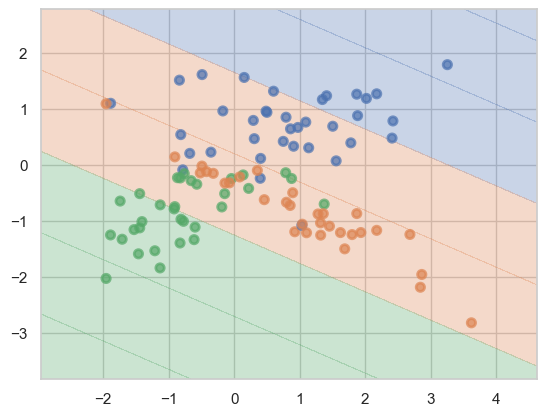

In [12]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

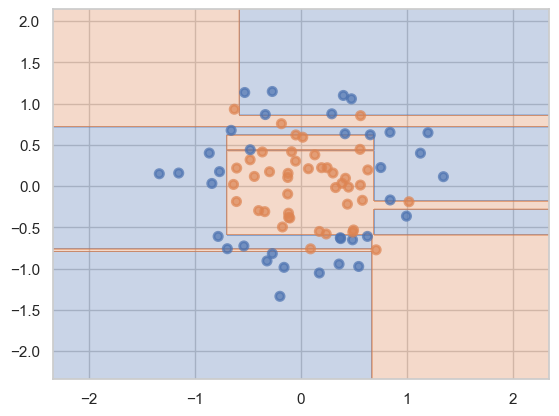

Accuracy = 0.65


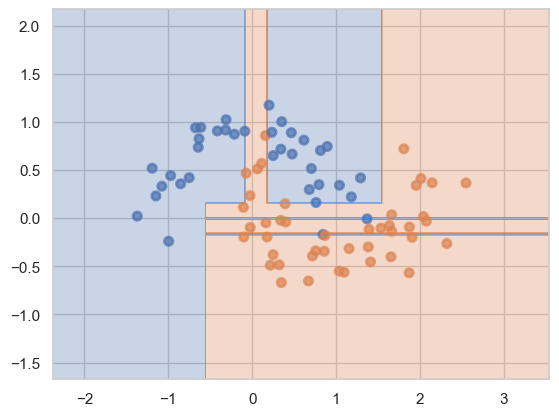

Accuracy = 0.95


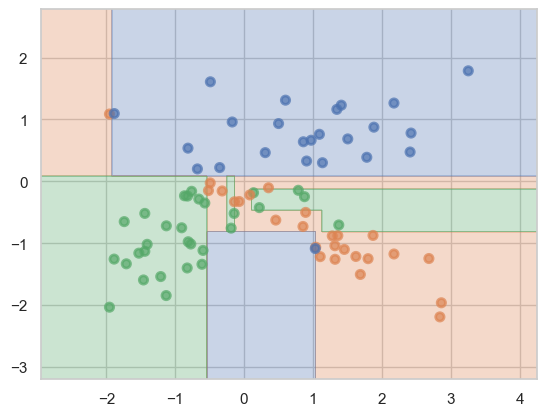

Accuracy = 0.7


In [14]:
for X_tr, X_t, y_tr, y_t in zip(X_train, X_test, y_train, y_test):
    model = DecisionTreeClassifier().fit(X_tr, y_tr)

    y_pred = model.predict(X_t)

    acc = accuracy_score(y_t, y_pred)
    plot_surface(model, X_tr, y_tr)
    print(f'Accuracy = {acc}')

__Ответ:__ первое дерево переобучилось не так сильно, второе чуть чуть, третье сильнее

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

Dataset 2 | max_depth = 2, min_samples_leaf = 1, accuracy = 1.0000


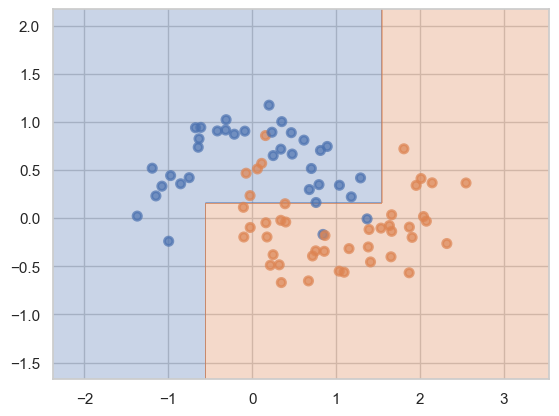

Dataset 2 | max_depth = 2, min_samples_leaf = 2, accuracy = 1.0000


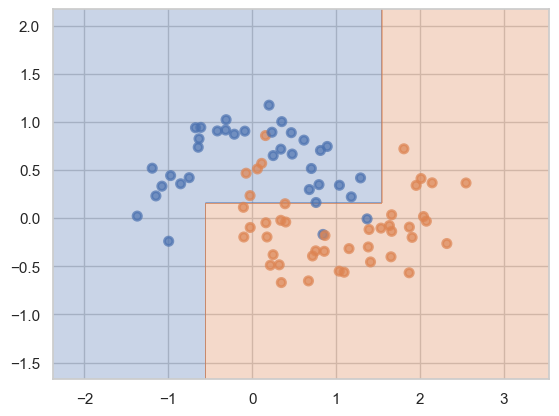

Dataset 2 | max_depth = 3, min_samples_leaf = 1, accuracy = 1.0000


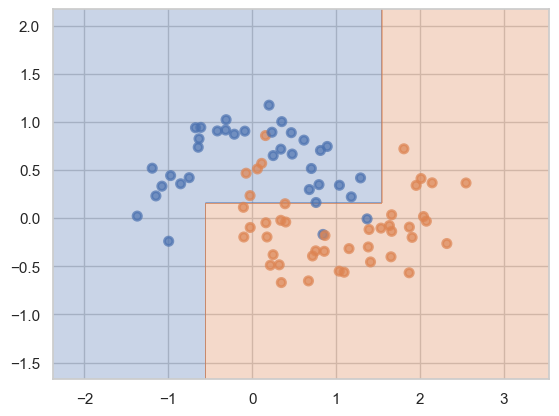

Dataset 2 | max_depth = 3, min_samples_leaf = 2, accuracy = 1.0000


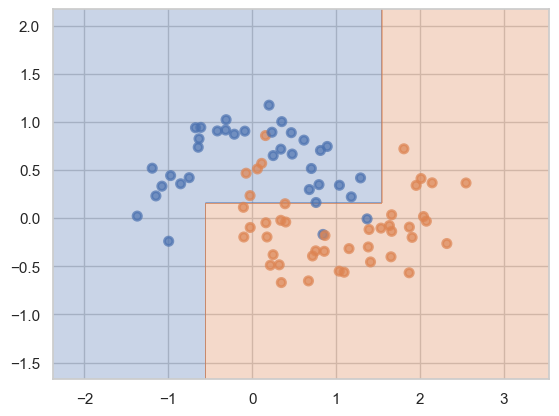

Dataset 2 | max_depth = 5, min_samples_leaf = 1, accuracy = 0.9500


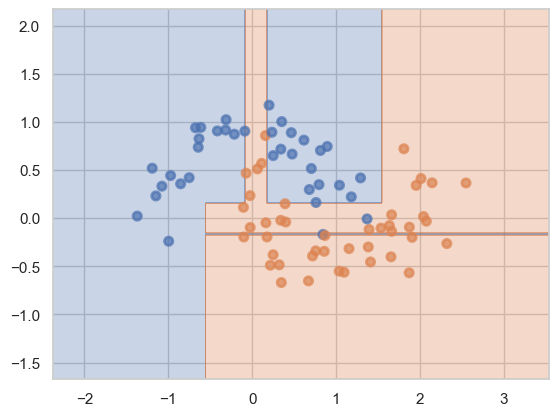

Dataset 2 | max_depth = 5, min_samples_leaf = 2, accuracy = 0.9500


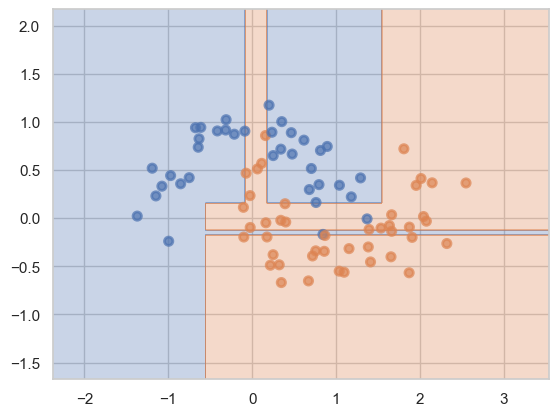

Dataset 1 | max_depth = 5, min_samples_leaf = 10, accuracy = 0.9000


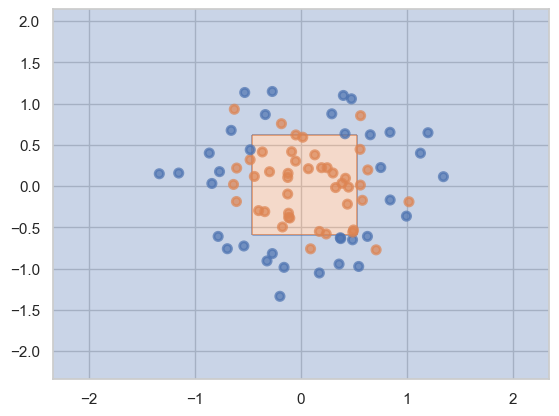

Dataset 2 | max_depth = 7, min_samples_leaf = 1, accuracy = 0.9500


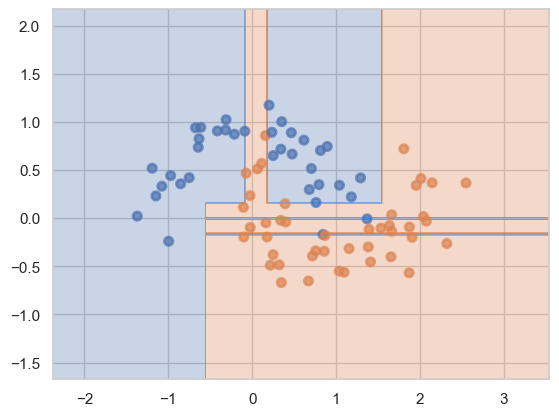

Dataset 2 | max_depth = 7, min_samples_leaf = 2, accuracy = 0.9500


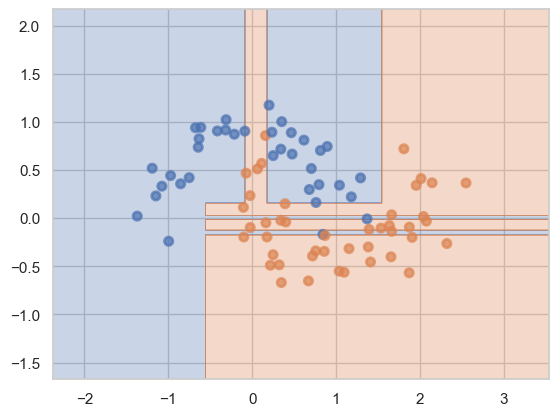

Dataset 1 | max_depth = 7, min_samples_leaf = 10, accuracy = 0.9000


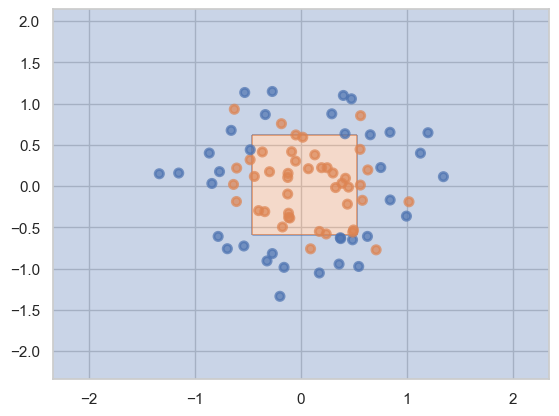

Dataset 2 | max_depth = 10, min_samples_leaf = 1, accuracy = 0.9500


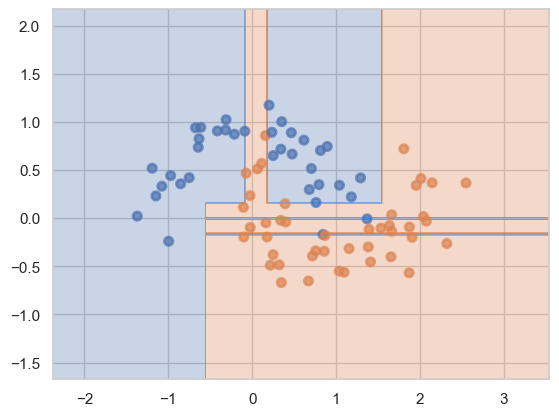

Dataset 2 | max_depth = 10, min_samples_leaf = 2, accuracy = 0.9500


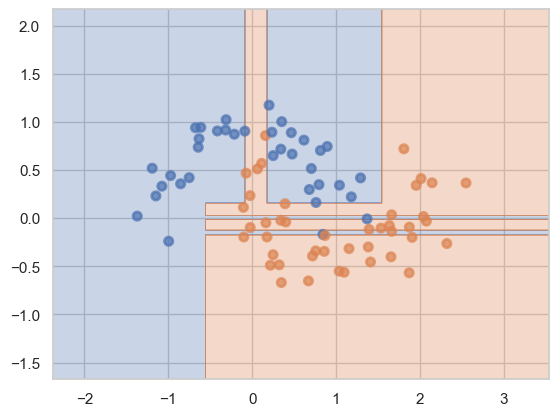

Dataset 1 | max_depth = 10, min_samples_leaf = 10, accuracy = 0.9000


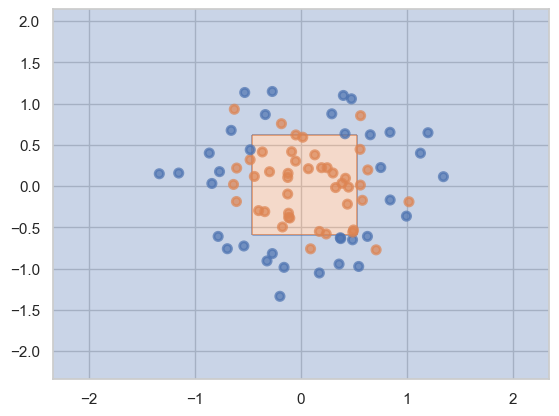

Dataset 2 | max_depth = None, min_samples_leaf = 1, accuracy = 0.9500


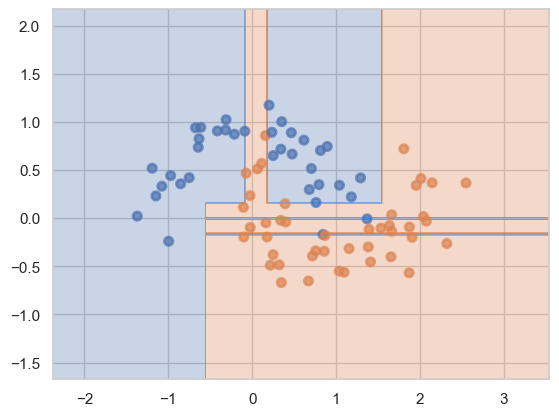

Dataset 2 | max_depth = None, min_samples_leaf = 2, accuracy = 0.9500


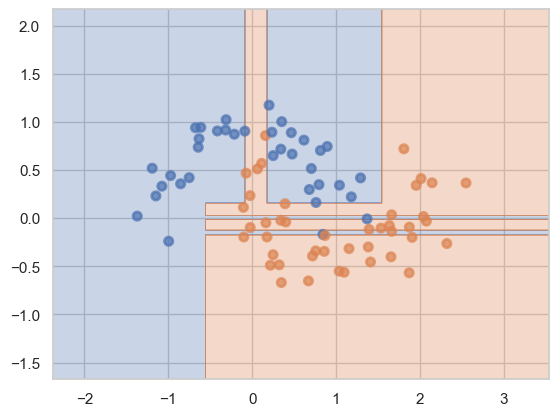

Dataset 1 | max_depth = None, min_samples_leaf = 10, accuracy = 0.9000


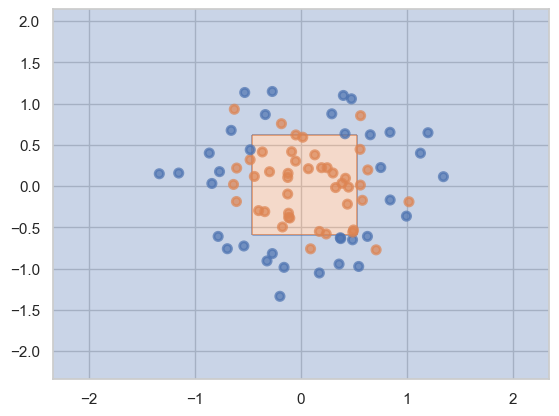

In [19]:
max_depth = [1, 2, 3, 5, 7, 10, None]
min_samples_leaf = [1, 2, 5, 10, 20]

for depth in max_depth:
    for leaf in min_samples_leaf:
        for i in range(len(X_train)):
            X_tr, X_t = X_train[i], X_test[i]
            y_tr, y_t = y_train[i], y_test[i]

            model = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leaf, random_state=0)
            model.fit(X_tr, y_tr)

            y_pred = model.predict(X_t)
            acc = accuracy_score(y_t, y_pred)

            if acc >= 0.9:
                print(f'Dataset {i+1} | max_depth = {depth}, min_samples_leaf = {leaf}, accuracy = {acc:.4f}')
                plot_surface(model, X_tr, y_tr)


__Ответ:__ Вкратце, больше глубина больше переобучаемость

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py


"""
Под критерием Джини здесь подразумевается следующая функция:
$$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
$R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
 $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

Указания:
* Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
* В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
* Поведение функции в случае константного признака может быть любым.
* При одинаковых приростах Джини нужно выбирать минимальный сплит.
* За наличие в функции циклов балл будет снижен. Векторизуйте! :)

:param feature_vector: вещественнозначный вектор значений признака
:param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

:return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
 разделить на две различные подвыборки, или поддерева
:return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
:return threshold_best: оптимальный порог (число)
:return gini_best: оптимальное значение критерия Джини (число)
    """

In [22]:
a = np.array([1, 1, 2, 2, 4, 6, 6, 8, 8])
a[a >= 5]

array([6, 6, 8, 8])

In [25]:
def find_best_split(feature_vector, target_vector):
    if len(np.unique(feature_vector)) <= 1:
        return None
    sort_idx = np.argsort(feature_vector)
    feature_vector = feature_vector[sort_idx]
    target_vector = target_vector[sort_idx]
    
    left = feature_vector[:-1]
    right = feature_vector[1:]
    mask = left != right
    thresholds = (left[mask] + right[mask])/2
    
    ginis = []
    gini_best = -np.inf
    t_best = None

    def H(t_vec):
        l = len(t_vec)
        if l == 0:
            return 0
        p0 = np.sum(t_vec == 0) / l
        p1 = np.sum(t_vec == 1) / l
        return 1 - p0**2 - p1**2

    for t in thresholds:
        mask_l = feature_vector <= t
        mask_r = ~mask_l
        
        l = len(feature_vector)
        l_l = np.sum(mask_l)
        l_r = np.sum(mask_r)
        
        if l_l == 0 or l_r == 0:
            continue
        
        H_l = H(target_vector[mask_l])
        H_r = H(target_vector[mask_r])
        
        gini = -(l_l * H_l + l_r * H_r) / l
        ginis.append(gini)
        
        if gini > gini_best:
            gini_best = gini
            t_best = t

    return thresholds, ginis, t_best, gini_best

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [26]:
data = pd.read_csv('students.csv')

In [27]:
data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [30]:
thresholds = []
ginis = []

for i in range(5):
    t, g, _ , _ = find_best_split(data.iloc[:, i].values, data.iloc[:, -1].values)
    thresholds.append(t)
    ginis.append(g)

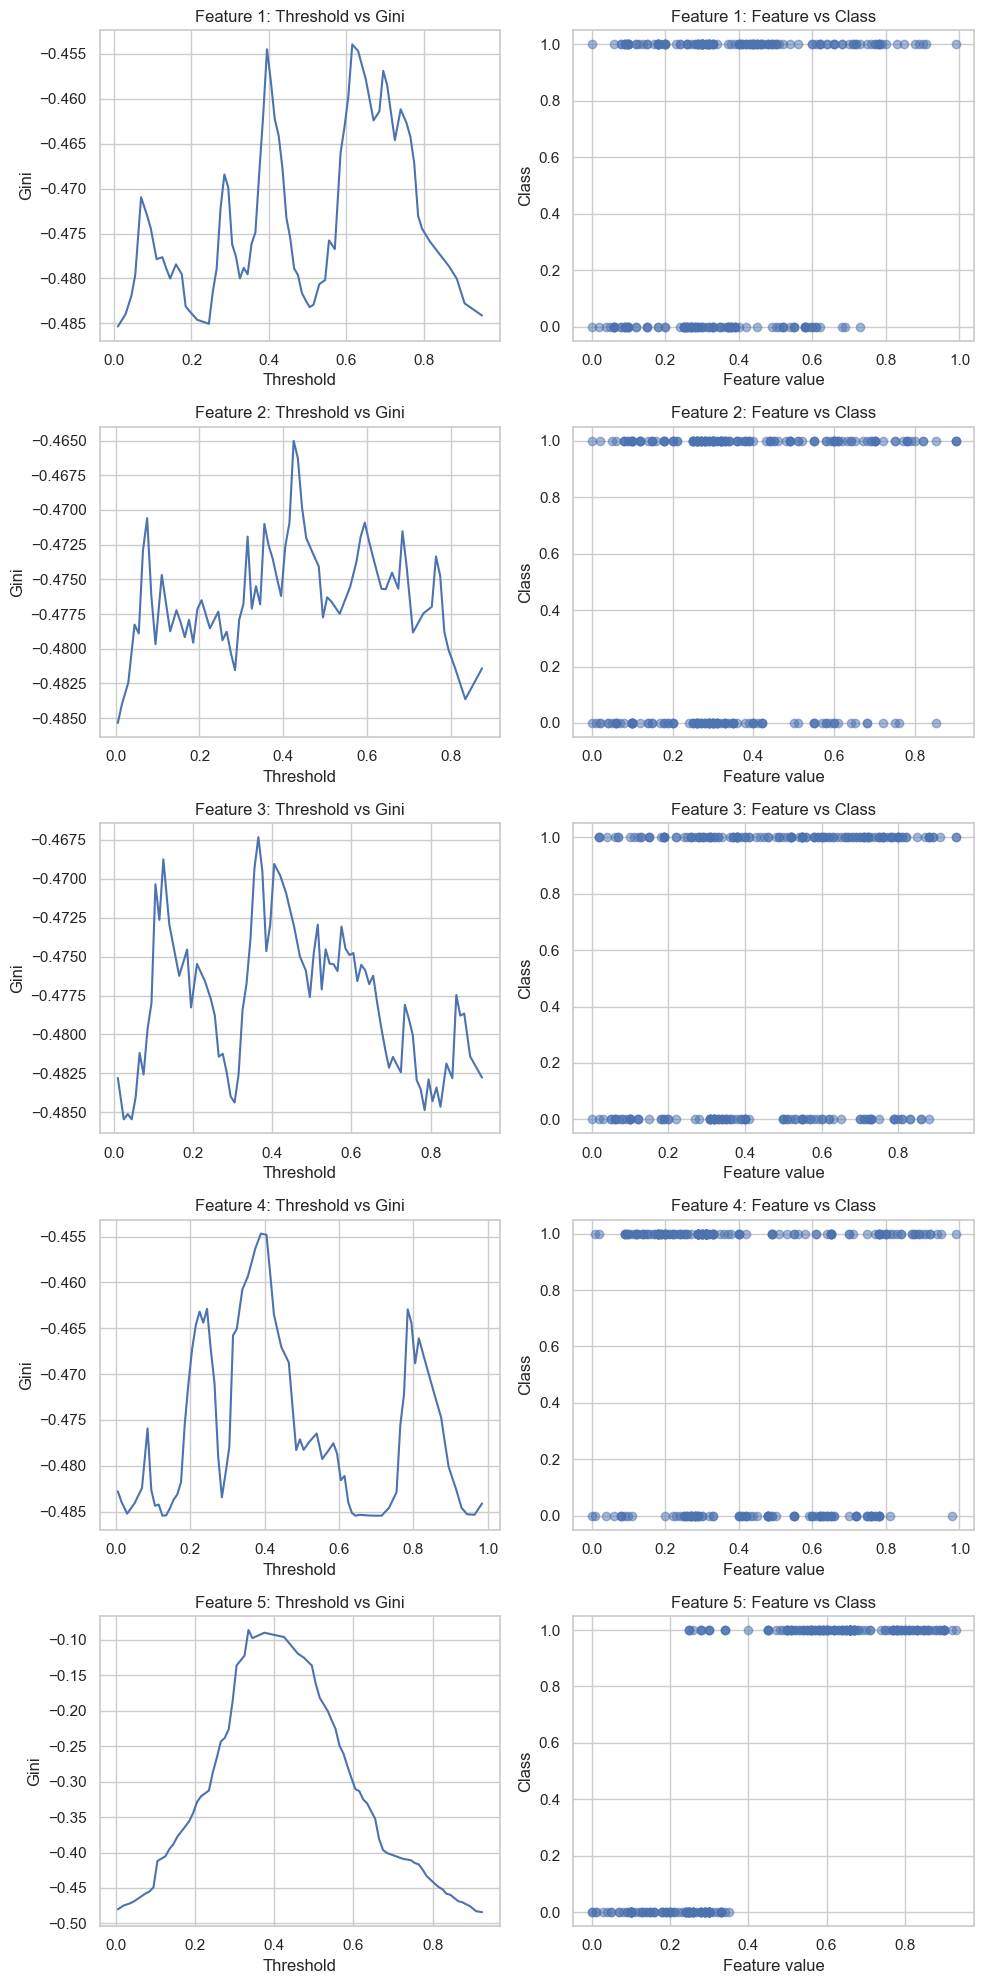

In [38]:
fig, axs = plt.subplots(5, 2, figsize=(10, 20))  # 5 строк, 2 столбца (по признаку)

for i in range(5):
    x = data.iloc[:, i].values
    y = data.iloc[:, -1].values
    
    thresholds, ginis, _, _ = find_best_split(x, y)
    axs[i, 0].plot(thresholds, ginis)
    axs[i, 0].set_title(f'Feature {i+1}: Threshold vs Gini')
    axs[i, 0].set_xlabel('Threshold')
    axs[i, 0].set_ylabel('Gini')

    axs[i, 1].scatter(x, y, alpha=0.5)
    axs[i, 1].set_title(f'Feature {i+1}: Feature vs Class')
    axs[i, 1].set_xlabel('Feature value')
    axs[i, 1].set_ylabel('Class')

plt.tight_layout()
plt.show()


__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

1. Исходя из кривых значений критерия Джини, деление выборки на два поддерева следует производить по пятому признаку, поскольку его значение Gini наилучшее среди всех остальных признаков. Это означает, что разбиение по нему даёт наибольшее снижение нечистоты. Данный результат согласуется с визуальной оценкой scatter-графика: значения признака хорошо разделяют классы, что подтверждает его высокую информативность.

2. Для "хороших" признаков кривая зависимости критерия Джини от порога имеет вид вогнутой параболы (напоминающей гору), где вблизи определённого значения достигается максимум (наилучшее разбиение).
В отличие от них, для "плохих" признаков кривая Gini либо почти плоская, либо сильно шумная, без ярко выраженного экстремума. Это обычно сопровождается тем, что на scatter-графике классы распределены хаотично, без какой-либо очевидной границы между ними — значит, признак слабо помогает в классификации.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

In [53]:
from collections import Counter

In [65]:
class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def _fit_node(self, sub_X, sub_y, node, depth=0):
        if self._max_depth is not None and depth >= self._max_depth:
            node['type'] = 'terminal'
            node['class'] = Counter(sub_y).most_common(1)[0][0]
            return
            
        if self._min_samples_split is not None and sub_X.shape[0] < self._min_samples_split:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return
            
        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_click / current_count
                sorted_categories = list(map(lambda x: x[0], sorted(ratio.items(), key=lambda x: x[1])))
                categories_map = dict(zip(sorted_categories, list(range(len(sorted_categories)))))

                feature_vector = np.array(list(map(lambda x: categories_map[x], sub_X[:, feature])))
            else:
                raise ValueError

            result = find_best_split(feature_vector, sub_y)
            if result is None:
                continue
            
            _, _, threshold, gini = result

            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical":
                    threshold_best = [category for category, idx in categories_map.items() if idx < threshold]         
                else:
                    raise ValueError

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best

        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
            split = sub_X[:, feature_best] < threshold_best
        
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
            split = np.isin(sub_X[:, feature_best], threshold_best)
        
        else:
            raise ValueError("Unknown feature type")

        if self._min_samples_leaf is not None:
            if sum(split) < self._min_samples_leaf or sum(~split) < self._min_samples_leaf:
                node["type"] = "terminal"
                node["class"] = Counter(sub_y).most_common(1)[0][0]
                return
                
        node["left_child"], node["right_child"] = {}, {}
        
        self._fit_node(sub_X[split], sub_y[split], node["left_child"], depth + 1)
        self._fit_node(sub_X[~split], sub_y[~split], node["right_child"], depth + 1)


    def _predict_node(self, x, node):
        if node['type'] == 'terminal':
            return node['class']
            
        feature = node['feature_split']
        value = x[feature]
        
        if self._feature_types[feature] == 'real':
            if value < node['threshold']:
                return self._predict_node(x, node['left_child'])
            else:
                return self._predict_node(x, node['right_child'])
        elif self._feature_types[feature] == 'categorical':
            if value in node['categories_split']:
                return self._predict_node(x, node['left_child'])
            else:
                return self._predict_node(x, node['right_child'])
        else:
            raise ValueError('Unknown feature type')
                

    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [41]:
data = pd.read_csv('agaricus-lepiota.data')

In [42]:
data.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [44]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [49]:
k = 20
indices = np.random.choice(1000, size=k, replace=False)
indices

array([270, 414, 686, 583, 865, 499, 794, 174, 518, 945, 501,  66,  85,
         5, 269,  10, 927, 649, 773,  18], dtype=int32)

In [58]:
tree = DecisionTree(feature_types=['categorical'] * X.shape[1])
n = X.shape[0]
k = n//2
idx = np.random.choice(n, size=k, replace=False)

X_sub = X.iloc[idx, :].values
y_sub = y.iloc[idx].values

tree.fit(X_sub, y_sub)

In [63]:
all_idx = np.arange(X.shape[0])
test_idx = np.setdiff1d(all_idx, idx)
X_test, y_test = X.iloc[test_idx, :].values, y.iloc[test_idx].values
y_pred = tree.predict(X_test)

In [64]:
accuracy_score(y_test, y_pred)

0.9965534219596258

__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [66]:
data = pd.read_csv('tic-tac-toe-endgame.csv')

In [67]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [71]:
X.shape

(958, 9)

In [72]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state=42)

In [85]:
max_depth_list = [1, 2, 3, 5, 7, 10, None]
min_samples_leaf_list = [1, 2, 5, 10]
min_samples_split_list = [2, 5, 10, 20]

results = []

for depth in max_depth_list:
    for leaf in min_samples_leaf_list:
        for split in min_samples_split_list:
            model = DecisionTree(
                feature_types=['categorical'] * X_train.shape[1],
                max_depth=depth,
                min_samples_split=split,
                min_samples_leaf=leaf
            )
            model.fit(X_train.values, y_train.values)
            y_pred = model.predict(X_test.values)
            acc = accuracy_score(y_test, y_pred)
            
            results.append({
                'max_depth': str(depth),  # для удобства отрисовки
                'min_samples_leaf': leaf,
                'min_samples_split': split,
                'accuracy': acc
            })

df_results = pd.DataFrame(results)

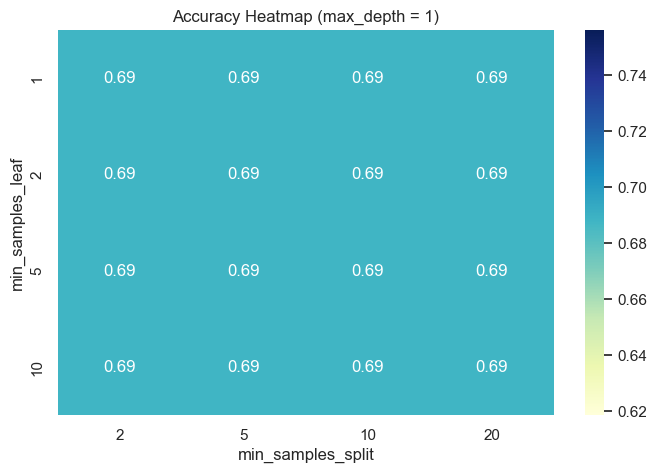

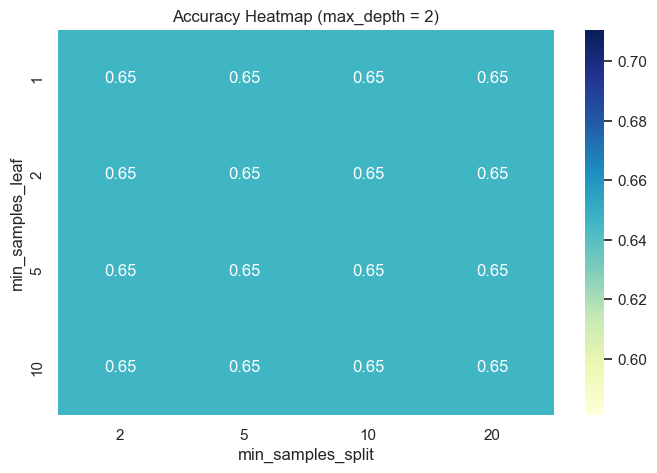

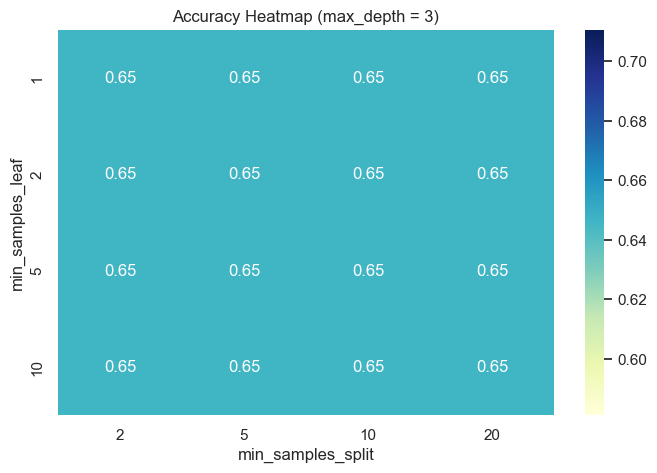

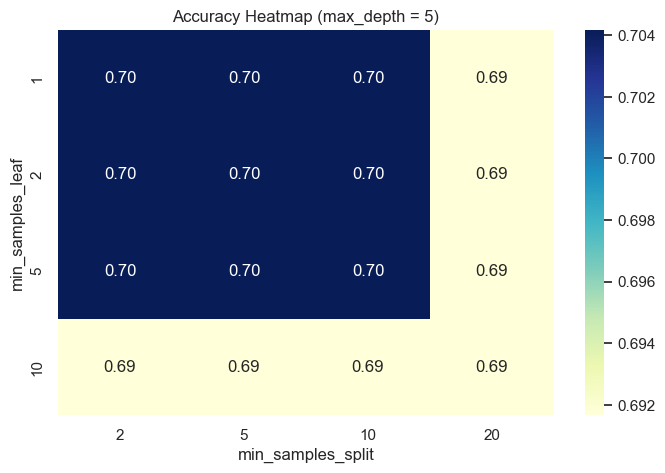

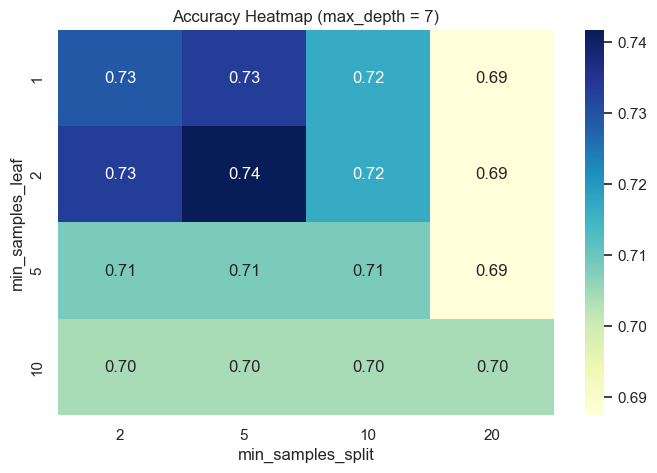

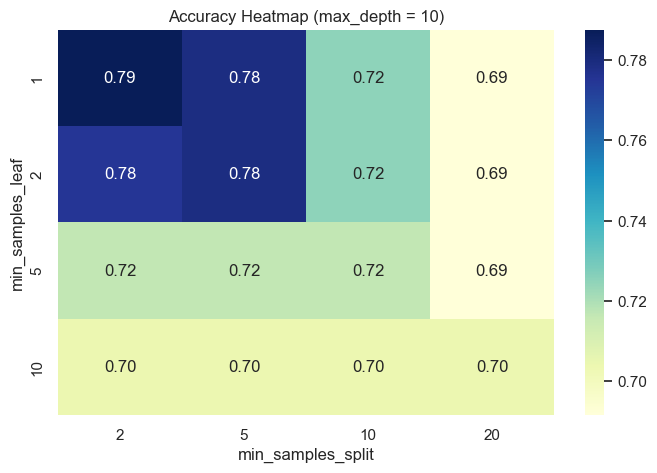

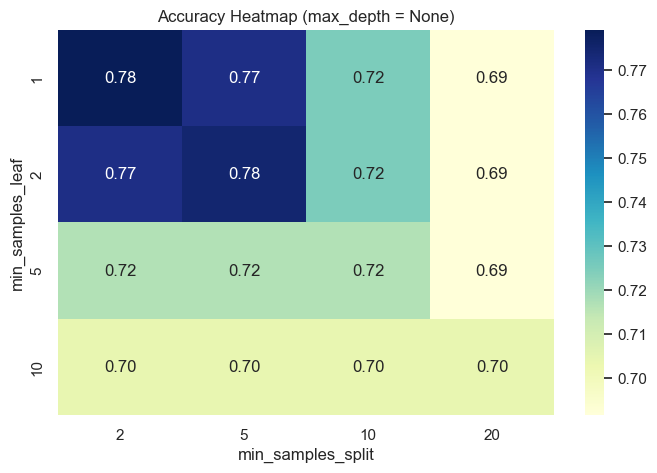

In [86]:
import seaborn as sns
for depth in df_results['max_depth'].unique():
    pivot_table = df_results[df_results['max_depth'] == depth].pivot(
        index='min_samples_leaf',
        columns='min_samples_split',
        values='accuracy'
    )

    plt.figure(figsize=(8, 5))
    sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.title(f'Accuracy Heatmap (max_depth = {depth})')
    plt.xlabel('min_samples_split')
    plt.ylabel('min_samples_leaf')
    plt.show()

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [91]:
dataset_names = ['mushrooms', 'tic-tac-toe', 'cars', 'nursery']
datasets = [pd.read_csv(s) for s in ['agaricus-lepiota.data', 'tic-tac-toe-endgame.csv', 'car.data', 'nursery.data']]
datasets[3]

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
2,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
3,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
4,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom
...,...,...,...,...,...,...,...,...,...
12954,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,spec_prior
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,not_recom
12956,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,spec_prior
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,spec_prior


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

Вставьте что угодно, описывающее ваши впечатления от этого задания: